# Exploratory Data Analysis

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta, date
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import svm
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import calplot
import time
import json
import sys
import os

In [6]:
sys.path.append(os.path.abspath(os.path.join('..')))

In [7]:
from helpers.db_connector import MySQLConnector
from helpers.data_process import *
from helpers.plotting import *
from helpers.db_query import *
from helpers.time import *

## Coursaware Dataset 

Student Data - No user demographics are available

In [4]:
%time user_data = pd.merge(getUserInfo(), getUserLocation(), on='AccountUserID', how='left')

Wall time: 567 ms


In [5]:
user_data.head()

,AccountUserID,Timestamp,Year,Week,Weekday,District,Region,Country,Continent
0,10547,1505205111,2017,37,02,Canton of Zurich,Central Europe,Switzerland,Europe
1,10031,1504712413,2017,36,03,Vaud,Central Europe,Switzerland,Europe
2,8435,1501944416,2017,31,06,Île-de-France,Western Europe,France,Europe
3,9734,1504627337,2017,36,02,Vaud,Central Europe,Switzerland,Europe
4,10615,1505223925,2017,37,02,Vaud,Central Europe,Switzerland,Europe


Video Data

In [6]:
video_events = getVideoEvents()
video_events = video_events[~video_events['AccountUserID'].isin(delLessActive(video_events))]
video_events = video_events[~video_events['AccountUserID'].isin(delRepentants(video_events))]
%time video_data = pd.merge(video_events, getVideoInfo(), on=['DataPackageID', 'VideoID'], how='left')

Wall time: 737 ms


In [7]:
video_data.head()

,DataPackageID,AccountUserID,VideoID,TimeStamp,EventType,Year,Title,Source
0,EPFL-AlgebreLineaire-2019,95017,ca2fa02b0daa43f295e76da61e53de2a,2019-10-06 09:55:25,Video.Play,2019,Leçon,https://www.youtube.com/watch?v=AFtb4KxwYGY
1,EPFL-AlgebreLineaire-2019,99055,ff000e7ca278461e86a87a39248c5e76,2019-10-16 19:36:49,Video.Play,2019,Leçon,https://www.youtube.com/watch?v=IV3C96VFWPU
2,EPFL-AlgebreLineaire-2018,51498,639779353a1849199d151d3caaca5004,2018-12-05 16:43:39,Video.Seek,2018,Leçon,https://www.youtube.com/watch?v=EKBYuQRt2aM
3,EPFL-AlgebreLineaire-2019,95017,ab810821cd8943ea8a0173e900af8417,2019-09-21 16:27:10,Video.Pause,2019,Leçon,https://www.youtube.com/watch?v=CapD6xwLKyg
4,EPFL-AlgebreLineaire-2019,95188,251475509b4e4a25b6e24fceadfa298c,2019-11-11 09:41:35,Video.Play,2019,Leçon,https://www.youtube.com/watch?v=f8-zqDA6k_c


Problem Data

In [8]:
%time problem_data = pd.merge(getProblemEvents(), getProblemInfo(), on=['DataPackageID', 'ProblemID'], how='left')

Wall time: 11.3 s


In [9]:
problem_data.head()

,DataPackageID,AccountUserID,ProblemID,TimeStamp,EventType,ProblemType,MaximumSubmissions,Title,Year
0,EPFL-AlgebreLineaire-2018,46461,44c46d58e2eb440b9308893be55aae3c,2018-12-01 15:18:00,Problem.Check,Quiz,1.0,Diagonalisation : problème 12,2018
1,EPFL-AlgebreLineaire-2019,96442,eee03e5d86f04216a006f2995a6251cf,2019-12-05 19:28:36,Problem.Graded,Quiz,1.0,Déterminant et inversibilité : problème 7,2019
2,EPFL-AlgebreLineaire-2018,11951,9066a9a110cc41fda2ac2ef9fb4fcd57,2018-10-28 14:01:30,Problem.Graded,Quiz,1.0,Composition d<squote/>applications : problème 17,2018
3,EPFL-AlgebreLineaire-2019,91007,2ae6c4de2fbd4d5c8267795a5d572b6e,2019-09-22 09:32:37,Problem.Check,Quiz,NaN,Quiz 1,2019
4,EPFL-AlgebreLineaire-2018,47544,156c7a9ac95047f59e1f524a2f3bd074,2018-10-09 10:45:29,Problem.Show,Quiz,1.0,Espaces vectoriels et sous-espaces vectoriels ...,2018


Forum Data

In [10]:
%time forum_data = pd.merge(getForumEvents(), getForumInfo(), on=['DataPackageID', 'PostID'], how='left')

Wall time: 441 ms


In [11]:
forum_data.head()

,DataPackageID,AccountUserID,TimeStamp,EventType,PostID,PostType,ParentPostType,ParentPostID,PostTitle,PostText,Year
0,EPFL-AlgebreLineaire-2017_T3,76312,2019-03-28 10:26:23,Forum.Load,None,NaN,NaN,NaN,NaN,NaN,NaN
1,EPFL-AlgebreLineaire-2017_T3,9758,2017-10-23 14:34:55,Forum.Thread.View,59eb452861678c0156000000,Thread,Forum,None,Videos du mooc - livre de C.Lay,"b""Salu M Deparis,<backslash/>nEst ce qu<squote...",2017.0
2,EPFL-AlgebreLineaire-2017_T3,9728,2017-09-05 16:06:03,Forum.Unknown,None,NaN,NaN,NaN,NaN,NaN,NaN
3,EPFL-AlgebreLineaire-2017_T3,9725,2017-09-05 18:43:16,Forum.Load,None,NaN,NaN,NaN,NaN,NaN,NaN
4,EPFL-AlgebreLineaire-2017_T3,4381,2017-11-13 07:25:01,Forum.Thread.View,59eb452861678c0156000000,Thread,Forum,None,Videos du mooc - livre de C.Lay,"b""Salu M Deparis,<backslash/>nEst ce qu<squote...",2017.0


Textbook Data

In [12]:
%time textbook_data = getTextbookEvents()

Wall time: 235 ms


In [13]:
textbook_data.head()

,AccountUserID,TimeStamp,EventType,OldPage,NewPage,CurrentZoom,ScrollDirection,Year
0,51615,2018-11-19 21:29:55,TextBook.Seek,None,None,None,None,2018
1,96550,2019-10-14 05:27:22,TextBook.Bookmark.Accessed,None,None,None,None,2019
2,95347,2019-11-11 15:42:08,TextBook.Seek,None,None,None,None,2019
3,29018,2018-04-01 15:36:03,TextBook.Seek,None,None,None,None,2017
4,8259,2018-08-16 11:48:03,TextBook.Seek,None,None,None,None,2018


## Exploratory Analysis

#### User Data Exploration

In [14]:
len(user_data.index)

753

In [15]:
user_data.groupby('Year').agg('count')['AccountUserID'].to_dict()

{2017: 143, 2018: 336, 2019: 274}

In [16]:
user_data.groupby('Continent').agg('count')['AccountUserID'].sort_values(ascending=False).to_dict()

{'Europe': 700, 'Africa': 14, 'Americas': 13, 'Asia': 9}

In [17]:
user_data.groupby('Country').agg('count')['AccountUserID'].sort_values(ascending=False)[:4].to_dict()

{'Switzerland': 519, 'France': 111, 'Netherlands': 46, 'United States': 12}

#### Video Data Exploration - Aggregated

In [18]:
video_data[['VideoID', 'Year']].drop_duplicates(keep='first').groupby('Year').agg('count')['VideoID'].to_dict()

{2017: 118, 2018: 116, 2019: 143}

In [19]:
video_data.groupby(['Year']).agg('count')['VideoID'].to_dict()

{2017: 121587, 2018: 323505, 2019: 422939}

In [20]:
video_data

,DataPackageID,AccountUserID,VideoID,TimeStamp,EventType,Year,Title,Source
0,EPFL-AlgebreLineaire-2019,95017,ca2fa02b0daa43f295e76da61e53de2a,2019-10-06 09:55:25,Video.Play,2019,Leçon,https://www.youtube.com/watch?v=AFtb4KxwYGY
1,EPFL-AlgebreLineaire-2019,99055,ff000e7ca278461e86a87a39248c5e76,2019-10-16 19:36:49,Video.Play,2019,Leçon,https://www.youtube.com/watch?v=IV3C96VFWPU
2,EPFL-AlgebreLineaire-2018,51498,639779353a1849199d151d3caaca5004,2018-12-05 16:43:39,Video.Seek,2018,Leçon,https://www.youtube.com/watch?v=EKBYuQRt2aM
3,EPFL-AlgebreLineaire-2019,95017,ab810821cd8943ea8a0173e900af8417,2019-09-21 16:27:10,Video.Pause,2019,Leçon,https://www.youtube.com/watch?v=CapD6xwLKyg
4,EPFL-AlgebreLineaire-2019,95188,251475509b4e4a25b6e24fceadfa298c,2019-11-11 09:41:35,Video.Play,2019,Leçon,https://www.youtube.com/watch?v=f8-zqDA6k_c
...,...,...,...,...,...,...,...,...
868026,EPFL-AlgebreLineaire-2019,95188,251c616b45df417f97072346ffeeecb8,2019-11-30 20:59:35,Video.Play,2019,Leçon,https://www.youtube.com/watch?v=1_TRBbZgpRA
868027,EPFL-AlgebreLineaire-2018,44733,8cf6c396f2114e0fa21a6309cf6626e1,2018-11-22 13:54:06,Video.Play,2018,Leçon,https://www.youtube.com/watch?v=p6ZISobWJaE
868028,EPFL-AlgebreLineaire-2019,94747,96c61097a16b4ff28b6973e557ab4aec,2019-11-07 11:43:36,Video.Seek,2019,Leçon,https://www.youtube.com/watch?v=GlwbNxWjkno
868029,EPFL-AlgebreLineaire-2019,94648,1062f12fca5341d6a62fa201efe1d2e8,2020-01-18 14:54:07,Video.Stop,2019,Leçon,https://www.youtube.com/watch?v=2tFXTRmEIQA


In [21]:
video_data.drop_duplicates(subset=['AccountUserID'], keep='first').groupby(['Year']).agg('count')['VideoID']

Year
2017    113
2018    183
2019    192
Name: VideoID, dtype: int64

In [22]:
video_data.groupby(['EventType', 'Year']).agg('count')['VideoID']

EventType                      Year
Video.Load                     2017      8421
                               2018     22188
                               2019     23810
Video.Pause                    2017     34941
                               2018     93024
                               2019    128436
Video.Play                     2017     45999
                               2018    129047
                               2019    169203
Video.Seek                     2017     17611
                               2018     43446
                               2019     49154
Video.SpeedChange              2017      1869
                               2018      2980
                               2019     13998
Video.Stop                     2017      3620
                               2018      8785
                               2019     10894
Video.Transcript.Download      2017        26
                               2018       158
                               2019        7

In [23]:
with open('../config/cf_mooc.json') as f:
    config = json.load(f)

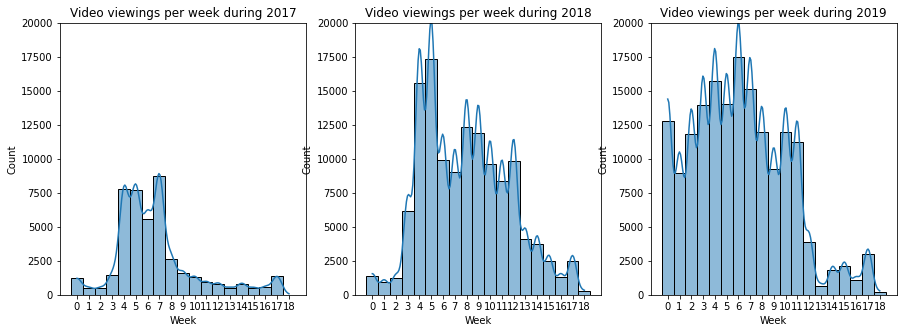

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for i, (year, group) in enumerate(video_data.groupby('Year')):
    course_df = group[group['EventType'] == 'Video.Play'][['TimeStamp','AccountUserID']].copy()
    course_df['Week'] = processYear(course_df['TimeStamp'], config[str(year)]['Start'],  config[str(year)]['End'])
    course_df = course_df.dropna().sort_values(by='TimeStamp')
    chart = sns.histplot(ax=axes[i], data=course_df, x='Week', kde=True)
    chart.set_title('Video viewings per week during ' + str(year))
    chart.set_ylim([0, 20000])

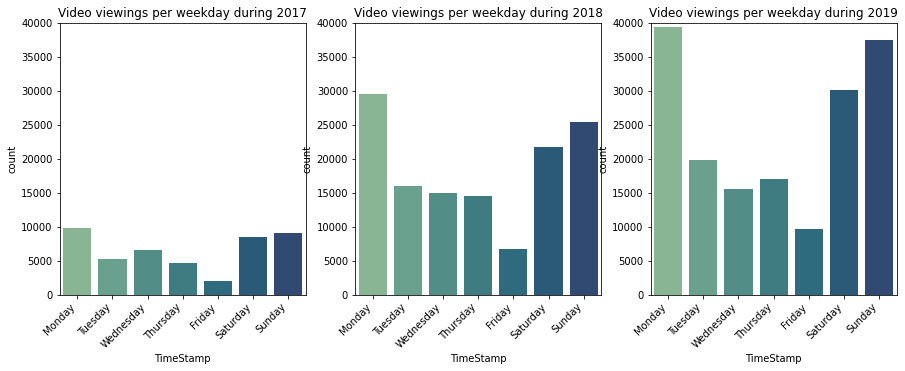

In [25]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for i, (year, group) in enumerate(video_data.groupby('Year')):
    week_df = group[group['EventType'] == 'Video.Play'][['TimeStamp','AccountUserID']].copy()
    week_df['TimeStamp'] = week_df['TimeStamp'].apply(lambda x: x.strftime('%A'))
    chart = sns.countplot(ax=axes[i], data=week_df, x='TimeStamp', order=days, palette='crest')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    chart.set_title('Video viewings per weekday during ' + str(year))
    chart.set_ylim([0, 40000])

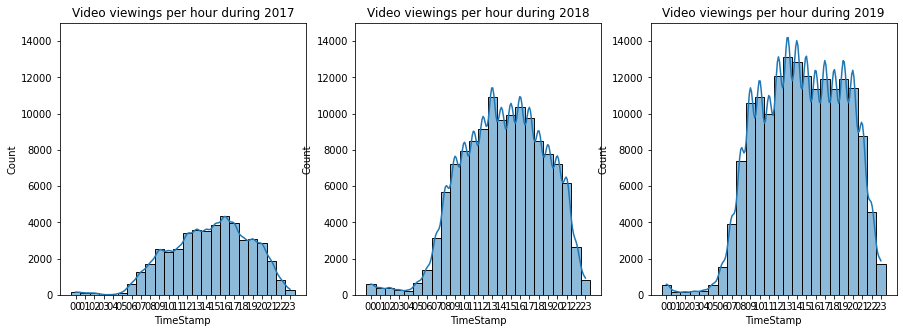

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for i, (year, group) in enumerate(video_data.groupby('Year')):
    hour_df = group[group['EventType'] == 'Video.Play'][['TimeStamp','AccountUserID']].copy()
    hour_df['TimeStamp'] = hour_df['TimeStamp'].apply(lambda x: x.strftime('%H'))
    chart = sns.histplot(ax=axes[i], data=hour_df[['TimeStamp', 'AccountUserID']].sort_values(by='TimeStamp'), x='TimeStamp', kde=True, palette='crest')
    chart.set_title('Video viewings per hour during ' + str(year))
    chart.set_ylim([0, 15000])

## Session Modeling

In [92]:
intervals = []
for index, group in tqdm(video_data.groupby(['AccountUserID'])):
    group = group[~group['EventType'].str.contains('Transcript')][['TimeStamp', 'EventType']].sort_values('TimeStamp')
    group['Interval'] = (group['TimeStamp'] - group['TimeStamp'].shift(1))
    group['Interval'] = group['Interval'].apply(lambda x: x.total_seconds())
    intervals += group['Interval'].tolist()[1:]
intervals = np.array(intervals)

100%|██████████| 488/488 [00:10<00:00, 46.77it/s]


In [62]:
np.mean(intervals), np.std(intervals)

(5645.206607422352, 161601.32181510245)

In [103]:
def getSeconds(row):
    if 'Start' in row and 'End' in row:
        return (row['End'] - row['Start']).total_seconds()
    return 0.0

sessions = []
durations = []
thr_session = 120 # Default timeout in Moodle
for index, group in tqdm(video_data.groupby(['AccountUserID'])):
    group = group[~group['EventType'].str.contains('Transcript')][['TimeStamp', 'EventType']].sort_values('TimeStamp')
    group['EventType'] = group['EventType'].apply(lambda x: x.split('.')[-1])
    group['Interval'] = (group['TimeStamp'] - group['TimeStamp'].shift(1))
    group['Interval'] = group['Interval'].apply(lambda x: x.total_seconds())
    group['SessionID'] = (group['TimeStamp'] - group['TimeStamp'].shift(1) > pd.Timedelta(thr_session, 'm')).cumsum() + 1
    session = group.groupby('SessionID').count()
    session['NoActions'] = session['TimeStamp']
    session['Start'] = group.drop_duplicates(subset=['SessionID'], keep='first')['TimeStamp'].values
    session['End'] = group.drop_duplicates(subset=['SessionID'], keep='last')['TimeStamp'].values
    session['Duration'] = session.apply(lambda row: getSeconds(row), axis=1)
    session['AccountUserID'] = index
    session['Actions'] = group.groupby('SessionID')['EventType'].apply(','.join).values
    session['Intervals'] = group.groupby('SessionID')['Interval'].apply(lambda x: list(x)[1:]).values
    session = session[['AccountUserID', 'Start', 'End', 'Duration', 'NoActions', 'Actions', 'Intervals']].reset_index()
    sessions.append(session)
sessions = pd.concat(sessions, ignore_index=True)

100%|██████████| 488/488 [00:18<00:00, 26.16it/s]


In [104]:
sessions.head()

,SessionID,AccountUserID,Start,End,Duration,NoActions,Actions,Intervals
0,1,10007,2017-10-12 14:54:41,2017-10-12 14:54:41,0.0,1,Load,[]
1,2,10007,2017-10-14 14:10:28,2017-10-14 14:16:00,332.0,7,"Load,Play,Play,Seek,Load,Seek,Play","[3.0, 32.0, 0.0, 277.0, 17.0, 3.0]"
2,3,10007,2017-10-16 19:14:23,2017-10-16 20:08:10,3227.0,17,"Load,Play,Pause,Stop,Load,Load,Play,Pause,Seek...","[31.0, 557.0, 0.0, 1437.0, 42.0, 5.0, 24.0, 35..."
3,4,10007,2017-10-18 16:18:31,2017-10-18 16:27:32,541.0,10,"Load,Play,SpeedChange,SpeedChange,SpeedChange,...","[10.0, 5.0, 11.0, 7.0, 8.0, 52.0, 26.0, 345.0,..."
4,5,10007,2017-10-18 20:14:40,2017-10-18 20:43:37,1737.0,20,"Load,Play,Pause,Stop,Seek,Play,Pause,Seek,Play...","[9.0, 2.0, 0.0, 1.0, 0.0, 27.0, 762.0, 1.0, 0...."


#### Transition matrix

In [118]:
actions_map = {a:i for i,a in enumerate(set([act for sact in sessions['Actions'] for act in sact.split(',')]))}

In [138]:
labels = list(actions_map.keys())

In [127]:
transition_matrix = np.zeros((len(set(actions_map.keys())), len(set(actions_map.keys()))))
for sact in tqdm(sessions['Actions']): 
    sact = sact.split(',')
    for i in range(len(sact)-1):
        transition_matrix[actions_map[sact[i]], actions_map[sact[i+1]]] += 1

100%|██████████| 13172/13172 [00:00<00:00, 15162.65it/s]


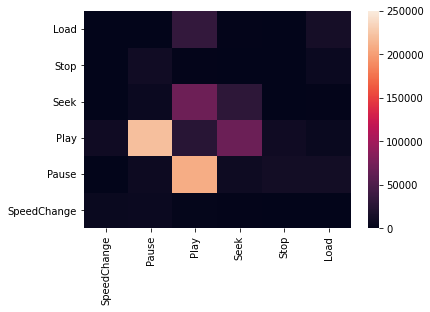

In [141]:
chart = sns.heatmap(transition_matrix, vmin=0, vmax=250000, xticklabels=labels, yticklabels=labels)
chart.invert_yaxis()

#### Average number of actions / duration per session

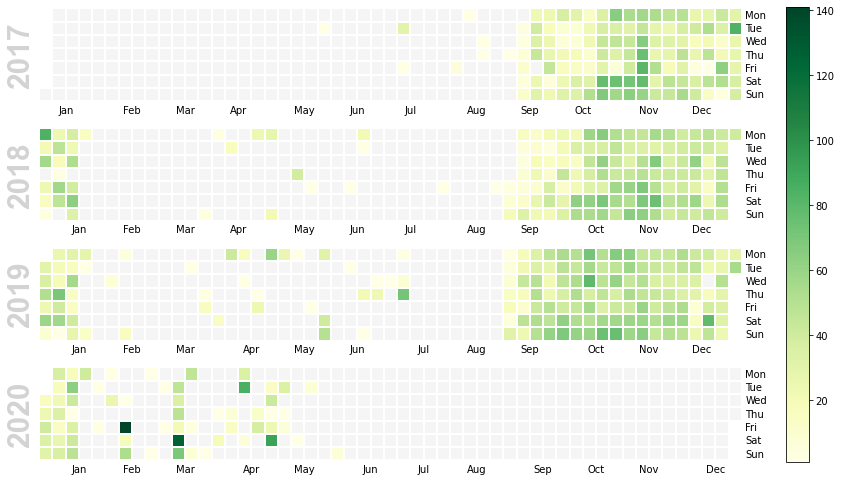

In [44]:
tmp_sessions = sessions.copy()
tmp_sessions.index = tmp_sessions['Start']
calplot.calplot(tmp_sessions['NoActions'], how='mean', cmap='YlGn');

#### Distribution of session lenght

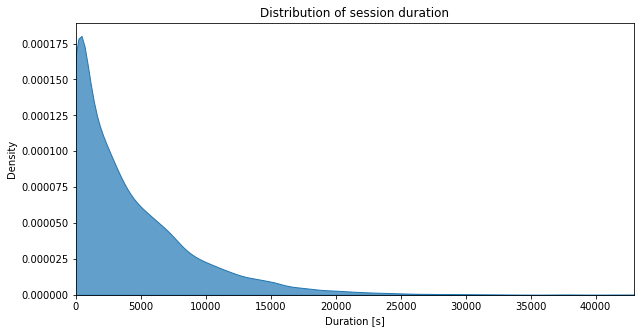

Average duration 4159 seconds


In [168]:
plt.figure(figsize=(10, 5))
sns.kdeplot(sessions['Duration'], shade=True, alpha=.7)
plt.title('Distribution of session duration')
plt.xlabel('Duration [s]')
plt.xlim([0, max(sessions['Duration'])])
plt.show()
print('Average duration', round(np.mean(sessions['Duration'])), 'seconds')

In [152]:
user_length_by_weeks = {}
for year, year_group in video_data.groupby('Year'):
    user_ids = list(set(year_group['AccountUserID']))
    year_sessions = sessions[sessions['AccountUserID'].isin(user_ids)].copy()
    year_sessions['Week'] = processYear(year_sessions['Start'], config[str(year)]['Start'],  config[str(year)]['End']).astype(int)
    year_sessions = year_sessions.dropna().sort_values(by='Start').copy()
    user_length_by_week = np.zeros((len(set(year_sessions['AccountUserID'])), 19))
    for i, (user, user_group) in enumerate(year_sessions.groupby('AccountUserID')):
        t = user_group.groupby('Week')['Duration'].mean()
        for j, v in zip(list(t.index), list(t.values)):
            if int(j) < 20:
                user_length_by_week[int(i)][int(j)] = v
    user_length_by_weeks[year] = user_length_by_week

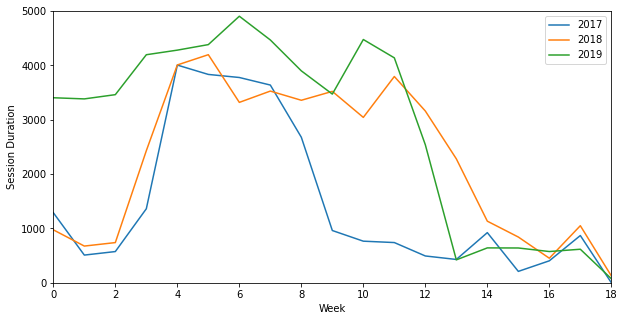

In [167]:
plt.figure(figsize=(10, 5))
for year in user_length_by_weeks.keys():
    plt.plot(np.mean(user_length_by_weeks[year], axis=0), label=str(year))
plt.xlim([0, 18])
plt.ylim([0, 5000])
plt.xlabel('Week')
plt.ylabel('Session Duration')
plt.legend()
plt.show()

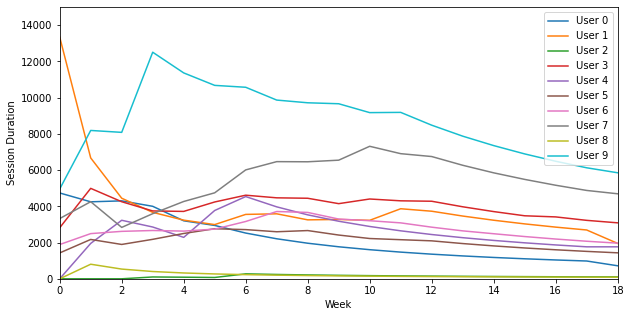

In [221]:
plt.figure(figsize=(10, 5))
for index, durations in enumerate(user_length_by_weeks[2019][:10]):
    plt.plot(pd.Series(durations).rolling(18, min_periods=1).mean(), label='User ' + str(index))
plt.xlim([0, 18])
plt.ylim([0, 15000])
plt.xlabel('Week')
plt.ylabel('Session Duration')
plt.legend()
plt.show()

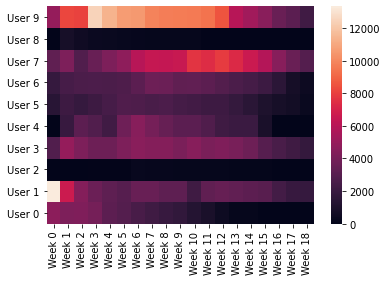

In [236]:
xlabels = ['Week ' + str(i) for i in range(19)]
ylabels = []
series = []

for index, durations in enumerate(user_length_by_weeks[2019][:10]):
    series.append(pd.Series(durations).rolling(10, min_periods=1).mean())
    ylabels.append('User ' + str(index))
    
chart = sns.heatmap(np.array(series), xticklabels=xlabels, yticklabels=ylabels)
chart.invert_yaxis()

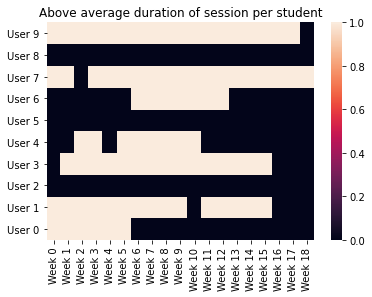

In [223]:
xlabels = ['Week ' + str(i) for i in range(19)]
ylabels = []
series = []

for index, durations in enumerate(user_length_by_weeks[2019][:10]):
    series.append([(1 if value >= np.mean(user_length_by_weeks[2019]) else 0) for value in pd.Series(durations).rolling(10, min_periods=1).mean()])
    ylabels.append('User ' + str(index))
    
chart = sns.heatmap(np.array(series), xticklabels=xlabels, yticklabels=ylabels)
chart.set_title('Above average duration of session per student')
chart.invert_yaxis()

#### Clustering learners based on the session duration

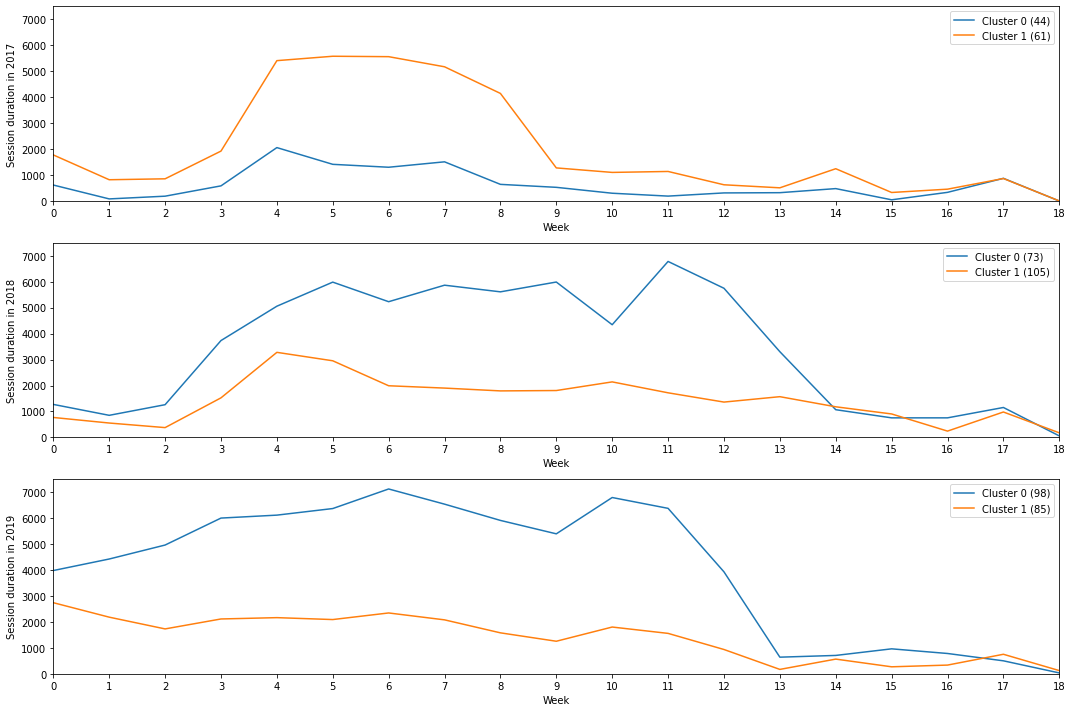

In [226]:
plt.figure(figsize=(15, 10))
for i, (year, year_group) in enumerate(video_data.groupby('Year')):
    plt.subplot(3,1,i+1)
    kmeans = KMeans(n_clusters=2).fit(user_length_by_weeks[year])
    for index, values in enumerate(kmeans.cluster_centers_):
        plt.plot(range(len(values)), values, label='Cluster ' + str(index) + ' (' + str(list(kmeans.labels_).count(index)) + ')')
    plt.legend()
    plt.ylabel('Session duration in ' + str(year))
    plt.xlabel('Week')
    plt.ylim([0, 7500])
    plt.xlim([0, 18])
    plt.xticks([i for i in range(0, 19)])
plt.tight_layout()
plt.show()

#### Inspect clusters

In [228]:
kmeans = KMeans(n_clusters=2).fit(user_length_by_weeks[2019])

In [229]:
kmeans.labels_

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1])

In [233]:
cluster_0 = user_length_by_weeks[2019][kmeans.labels_ == 0]
cluster_1 = user_length_by_weeks[2019][kmeans.labels_ == 1]

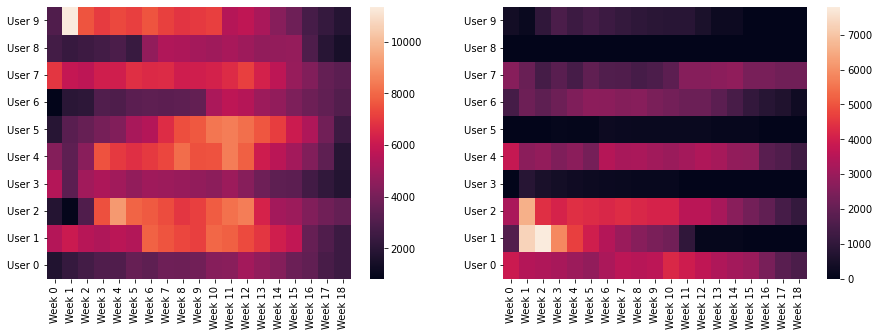

In [253]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

xlabels = ['Week ' + str(i) for i in range(19)]
ylabels = []
series = []
for index, durations in enumerate(cluster_0[np.random.randint(len(cluster_0), size=10), :]):
    series.append(pd.Series(durations).rolling(10, min_periods=1).mean())
    ylabels.append('User ' + str(index))
chart = sns.heatmap(np.array(series), ax=axes[0], xticklabels=xlabels, yticklabels=ylabels)
chart.invert_yaxis()

xlabels = ['Week ' + str(i) for i in range(19)]
ylabels = []
series = []
for index, durations in enumerate(cluster_1[np.random.randint(len(cluster_1), size=10), :]):
    series.append(pd.Series(durations).rolling(10, min_periods=1).mean())
    ylabels.append('User ' + str(index))
chart = sns.heatmap(np.array(series), ax=axes[1], xticklabels=xlabels, yticklabels=ylabels)
chart.invert_yaxis()

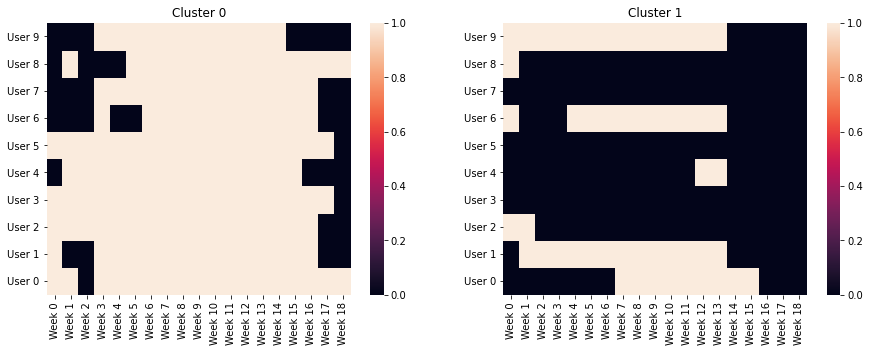

In [255]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

xlabels = ['Week ' + str(i) for i in range(19)]
ylabels = []
series = []
for index, durations in enumerate(cluster_0[np.random.randint(len(cluster_0), size=10), :]):
    series.append([(1 if value >= np.mean(user_length_by_weeks[2019]) else 0) for value in pd.Series(durations).rolling(10, min_periods=1).mean()])
    ylabels.append('User ' + str(index))
chart = sns.heatmap(np.array(series), ax=axes[0], xticklabels=xlabels, yticklabels=ylabels)
chart.set_title('Cluster 0')
chart.invert_yaxis()

xlabels = ['Week ' + str(i) for i in range(19)]
ylabels = []
series = []
for index, durations in enumerate(cluster_1[np.random.randint(len(cluster_1), size=10), :]):
    series.append([(1 if value >= np.mean(user_length_by_weeks[2019]) else 0) for value in pd.Series(durations).rolling(10, min_periods=1).mean()])
    ylabels.append('User ' + str(index))
chart = sns.heatmap(np.array(series), ax=axes[1], xticklabels=xlabels, yticklabels=ylabels)
chart.set_title('Cluster 1')
chart.invert_yaxis()